### esempio di lettura di un run di dati (6061) e uno di piedistalli (6060)


In [1]:
import midas.file_reader
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import cygno as cy
import time
import pandas as pd

lettura info file dati:

lettura file dati, WARING: path e' dove si trova il file, cloud=False dice che il file vine letto in posix (quindi se si e' gia' sulla cloud va lasciato cosi) da remoto va messo cloud=True e il path diventa il luogo in cui il file vine scaricato e letto, se viene richimato lo stesso file dal path questo non vine piu' scaricato ma solamente letto 

legge le waveforms (fino alla 5 perche' 5 ne acquisimo) e ne fa un plot

fa il plot dell'ultima imagine aperta (matrice image)

In [2]:
number_of_w_readed= 9
def graficiveloci(full_header,number_of_w_readed):
    if full_header[0][0]==1:
        singleplot =True
    else:
        singleplot= False
    fig, ax = plt.subplots(full_header[0][0], number_of_w_readed, figsize=(18, 3))

    for t in range(0, full_header[0][0]):
        offset = t*full_header[1][0]
        for w in range(0, number_of_w_readed):
            if singleplot:
                ax[w].plot(np.linspace(0, full_header[2][0], full_header[2][0]), w_fast[offset], label="t: {:d} w{:d}".format(t,w))
            else:
                ax[t,w].plot(np.linspace(0, full_header[2][0], full_header[2][0]), w_fast[offset], label="t: {:d} w{:d}".format(t,w))
            #ax[t,w].legend()
            offset+=1
number_of_w_readed2 = 8
def graficilentii(full_header,number_of_w_readed):
    if full_header[0][0]==1:
        singleplot =True
    else:
        singleplot= False
    fig, ax = plt.subplots(full_header[0][1], number_of_w_readed, figsize=(18, 3))

    for t in range(0, full_header[0][1]):
        offset = t*full_header[1][1]
        for w in range(0, number_of_w_readed):
            if singleplot:
                ax[w].plot(np.linspace(0, full_header[2][1], full_header[2][1]), w_slow[offset], label="t: {:d} w{:d}".format(t,w))
                #plt.ylim(0,2500)
            else:
                ax[t,w].plot(np.linspace(0, full_header[2][1], full_header[2][1]), w_slow[offset], label="t: {:d} w{:d}".format(t,w))
                 #plt.ylim(0,2500)
        #ax[t,w].legend()
            offset+=1

In [4]:
verbose = False
outplot = True
#mfile = cy.open_mid(run=10044, path='/s3/cygno-data/', cloud=False, tag='LNF', verbose=verbose)
mfile = cy.open_mid(run=47982, path='/s3/cygno-data/', cloud=False, tag='LNGS', verbose=verbose)
odb = cy.get_bor_odb(mfile)
corrected  = odb.data['Configurations']['DRS4Correction']
channels_offsets  = odb.data['Configurations']['DigitizerOffset']
header_environment = odb.data['Equipment']['Environment']['Settings']['Names Input']
dslow = pd.DataFrame(columns = header_environment)

for event in mfile:
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))
    print("Received event with timestamp %s containing banks %s" % (event.header.timestamp, bank_names))
    print("%s, banks %s" % (datetime.utcfromtimestamp(event.header.timestamp).strftime('%Y-%m-%d %H:%M:%S'), bank_names))

    for bank_name, bank in event.banks.items():
            
        if ('DGH0' in bank_name): # PMTs wavform 
            full_header= cy.daq_dgz_full2header(event.banks['DGH0'], verbose=verbose)
            print (full_header)
        #     w_fast, w_slow = cy.daq_dgz_full2array(event.banks['DIG0'], full_header, verbose=verbose, 
        #                                            corrected=corrected, ch_offset=channels_offsets)
        #     if outplot:
        #         graficiveloci(full_header,number_of_w_readed)
        #         plt.show()
        #         graficilentii(full_header,number_of_w_readed2)
        #         plt.show()
        # if bank_name=='CAM0': # CAM image
        #     image, _, _ = cy.daq_cam2array(bank) # matrice delle imagine
        #     if outplot:
        #         plt.figure(figsize=(8,8))
        #         plt.imshow(image, vmin=95, vmax=120)
        #         plt.show()
        # if bank_name=='INPT': # SLOW channels array
        #     slow = cy.daq_slow2array(bank)
        #     dslow.loc[len(dslow)] = slow
        #     print(dslow)
    if event.header.serial_number == 20: 
        break

Saw a special event
Event # 0 of type ID 3 contains banks DMND, MSRD, CRNT, STAT, TPTR
Received event with timestamp 1708000052 containing banks DMND, MSRD, CRNT, STAT, TPTR
2024-02-15 12:27:32, banks DMND, MSRD, CRNT, STAT, TPTR
Event # 0 of type ID 4 contains banks DMND, MSRD, CRNT, STAT, TPTR
Received event with timestamp 1708000052 containing banks DMND, MSRD, CRNT, STAT, TPTR
2024-02-15 12:27:32, banks DMND, MSRD, CRNT, STAT, TPTR
Event # 0 of type ID 6 contains banks DMND, MSRD
Received event with timestamp 1708000052 containing banks DMND, MSRD
2024-02-15 12:27:32, banks DMND, MSRD
Event # 122 of type ID 8 contains banks TMOD
Received event with timestamp 1708000053 containing banks TMOD
2024-02-15 12:27:33, banks TMOD
Event # 0 of type ID 1 contains banks DIG0, DGH0, CAM0
Received event with timestamp 1708000052 containing banks DIG0, DGH0, CAM0
2024-02-15 12:27:32, banks DIG0, DGH0, CAM0
Event # 0 of type ID 7 contains banks TCAM
Received event with timestamp 1708000054 contai

In [7]:
print(full_header.itemDict)

{'0': array([25, 25]), '1': array([32,  8]), '2': array([1024, 4000]), '3': array([4096, 4096]), '4': array([1333,  250]), '5': [array([    0, 13107, 13107, 13107, 13107, 13107, 13107, 13107, 32768,
       32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768,
       32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768,
       32768, 32768, 32768, 32768, 32768]), array([ 3276, 32768, 32768, 32768, 32768, 32768, 32768, 32768])], '6': [array([ 1969848,  3864422,  5991878,  9505384, 15713408, 16926674,
       20340698, 26511196, 28658596, 30107116, 30305428, 31955382,
       33283292, 33746048, 43340886, 45792842, 49255898, 50067908,
       50717700, 51146856, 51588264, 52319496, 54134262, 55032628,
       55771944]), array([ 2361453,  4382329,  6651611, 10399347, 17021231, 18315381,
       21957001, 28538857, 30829411, 32374499, 32586029, 34345979,
       35762415, 36256019, 46490501, 49105917, 52799837, 53665981,
       54359091, 54816857, 55287693, 56067671, 58003419, 

In [7]:
np.size(image)

5308416

In [15]:
type(image[0][0])


numpy.int64

In [18]:
im2 = np.zeros((2304, 2304), dtype=np.int64)

In [19]:
im2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

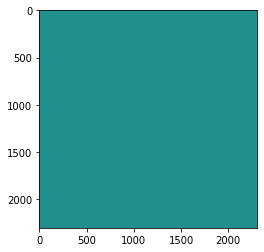

In [21]:
plt.imshow(im2, vmin=-1, vmax=1)
plt.show()